In [ ]:
#Keven Disen 111433335
#Final Project 2 Question 3

In [1]:
import tensorflow.keras
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
get_ipython().run_line_magic('matplotlib', 'inline')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from sklearn.model_selection import train_test_split



Using TensorFlow backend.

Bad key "text.kerning_factor" on line 4 in
/Users/keven/opt/anaconda3/envs/tf/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
df=pd.read_csv('test.csv')
emotionsTest=df.emotion
images_flattened = df.pixels

# OK, now process all images to make all of them into numpy array to store 48x48 images
image=np.array(pd.Series(images_flattened[0].split()).map(lambda x: int(x))).reshape(1,48,48)

for i in range(1,len(images_flattened)):
    image_next = np.array(pd.Series(images_flattened[i].split()).map(lambda x: int(x))).reshape(1,48,48)
    image=np.vstack([image,image_next])
    
Xtest = image

emotionsTest.shape

(1044,)

In [3]:
Xtrain = np.load('np_training_data.npy')
df=pd.read_csv('facial_expression.csv') 
emotions=df.emotion
ytrain = np.array(emotions)
Xtrain.shape

(26859, 48, 48)

In [4]:


X_test_2 = Xtest.reshape((1044, 48, 48, 1))
X_train_2 = Xtrain.reshape((26859, 48, 48, 1))

X_train_norm2 = X_train_2 / 255
X_test_norm2 = X_test_2 / 255


y_train_2 = ytrain.reshape((26859,1))
#y_test_2 = emotionsTest.reshape((1044,1))



In [5]:
y_train_catg= to_categorical(y_train_2, num_classes=6)
y_test_catg = to_categorical(emotionsTest, num_classes=6)

y_train_catg.shape

(26859, 6)

In [9]:
cnn = Sequential()
cnn.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',
              input_shape=(48, 48, 1)))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(3, 3)))

cnn.add(Flatten())

cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dense(units=6, activation='softmax'))

In [10]:
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])



In [11]:
cnn.fit(X_train_norm2, y_train_catg, epochs=15, batch_size=1000, validation_split=0.2)  # use 20% data for validation of the model



Train on 21487 samples, validate on 5372 samples
Epoch 1/15
21487/21487 [==============================] - 60s 3ms/sample - loss: 1.7630 - accuracy: 0.2398 - val_loss: 1.7317 - val_accuracy: 0.2643
Epoch 2/15
21487/21487 [==============================] - 55s 3ms/sample - loss: 1.6790 - accuracy: 0.3022 - val_loss: 1.6308 - val_accuracy: 0.3561
Epoch 3/15
21487/21487 [==============================] - 56s 3ms/sample - loss: 1.5837 - accuracy: 0.3687 - val_loss: 1.5504 - val_accuracy: 0.3824
Epoch 4/15
21487/21487 [==============================] - 55s 3ms/sample - loss: 1.5221 - accuracy: 0.4023 - val_loss: 1.5551 - val_accuracy: 0.3933
Epoch 5/15
21487/21487 [==============================] - 55s 3ms/sample - loss: 1.4798 - accuracy: 0.4191 - val_loss: 1.4832 - val_accuracy: 0.4155
Epoch 6/15
21487/21487 [==============================] - 55s 3ms/sample - loss: 1.4325 - accuracy: 0.4445 - val_loss: 1.4332 - val_accuracy: 0.4421
Epoch 7/15
21487/21487 [==============================] -

In [12]:
loss, accuracy = cnn.evaluate(X_test_norm2, y_test_catg)



1044/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [13]:
predictions = cnn.predict(X_test_norm2)
predictions[10]   # see the data structure


array([0.3862963 , 0.05349817, 0.02388622, 0.06327514, 0.02602344,
       0.44702065], dtype=float32)

In [14]:
emotionsTest[10]



0

In [15]:
# since the predictions generat the probablity of digits, we will do the same thing as the basic neural model
np.argmax(predictions[10])

5

(6.0, 0.0)

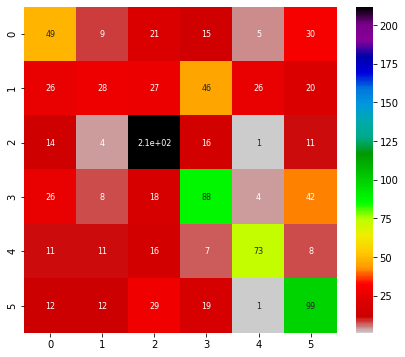

In [16]:
# We use the same plotting method to see the confusion matrix
y_pred = [np.argmax(predictions[num]) for num in range(len(emotionsTest))]

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(emotionsTest,y_pred)  # put true values on the left and predicted value on the right

import pandas as pd
import seaborn as sns

confusion_df = pd.DataFrame(conf_mat)
figure = plt.figure(figsize=(7,6))
axes = sns.heatmap(confusion_df, annot=True,annot_kws={"size": 8},
                  cmap=plt.cm.nipy_spectral_r)

axes.set_ylim(sorted(axes.get_xlim(), reverse=True))




In [17]:
faces = Xtest.reshape((1044, 48, 48))

In [18]:
incorrect_predictions = []
correct_predictions = []

#In the following snippet, pred is the predicted value array, and expect is the expected value array
#NumPy’s argmax function determines index of an array’s highest valued element
for i, (pred, expect) in enumerate(zip(predictions, emotionsTest)):
    predicted, expected = np.argmax(pred), expect

    if predicted != expected:  # prediction was incorrect
        incorrect_predictions.append(
            (i, faces[i], predicted, expected))
        
    if predicted == expected:
        correct_predictions.append((i, faces[i], predicted, expected))



In [19]:
len(incorrect_predictions)

495

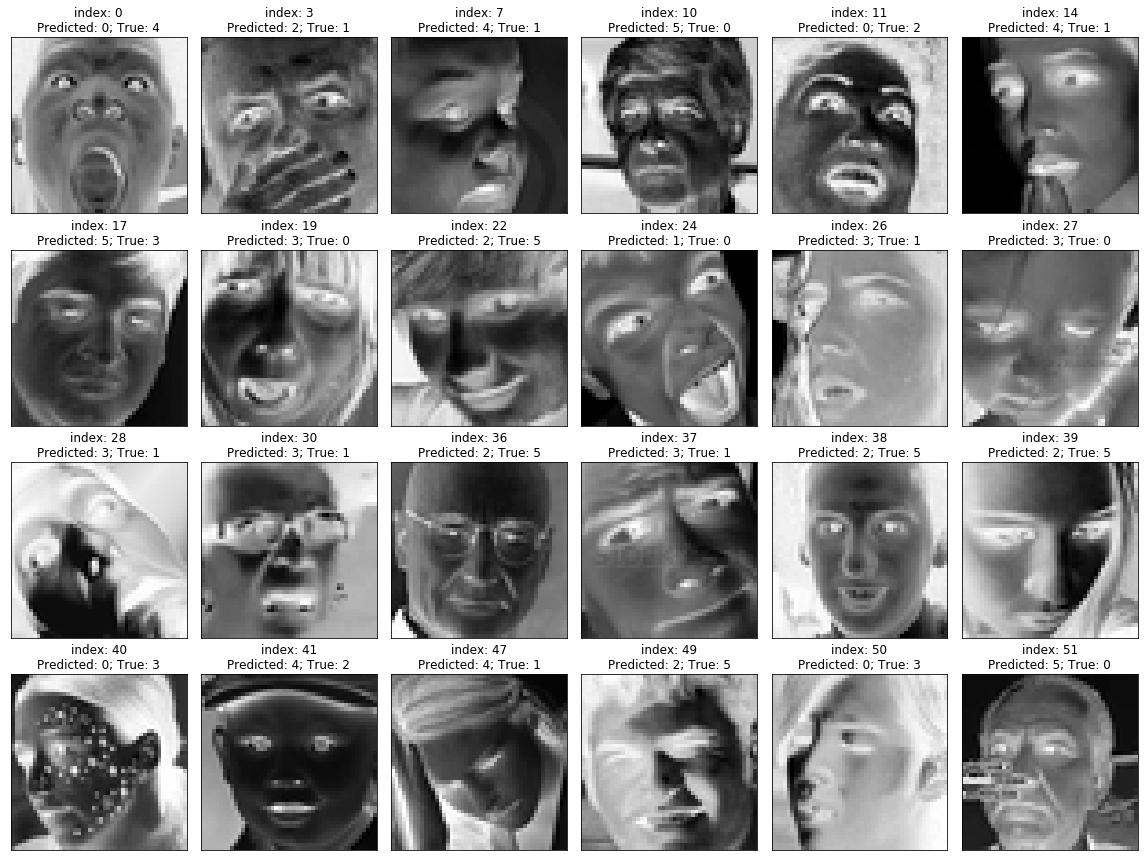

In [20]:
#Incorrect predictions

figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))

for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(f'index: {index}\nPredicted: {predicted}; True: {expected}')
plt.tight_layout()

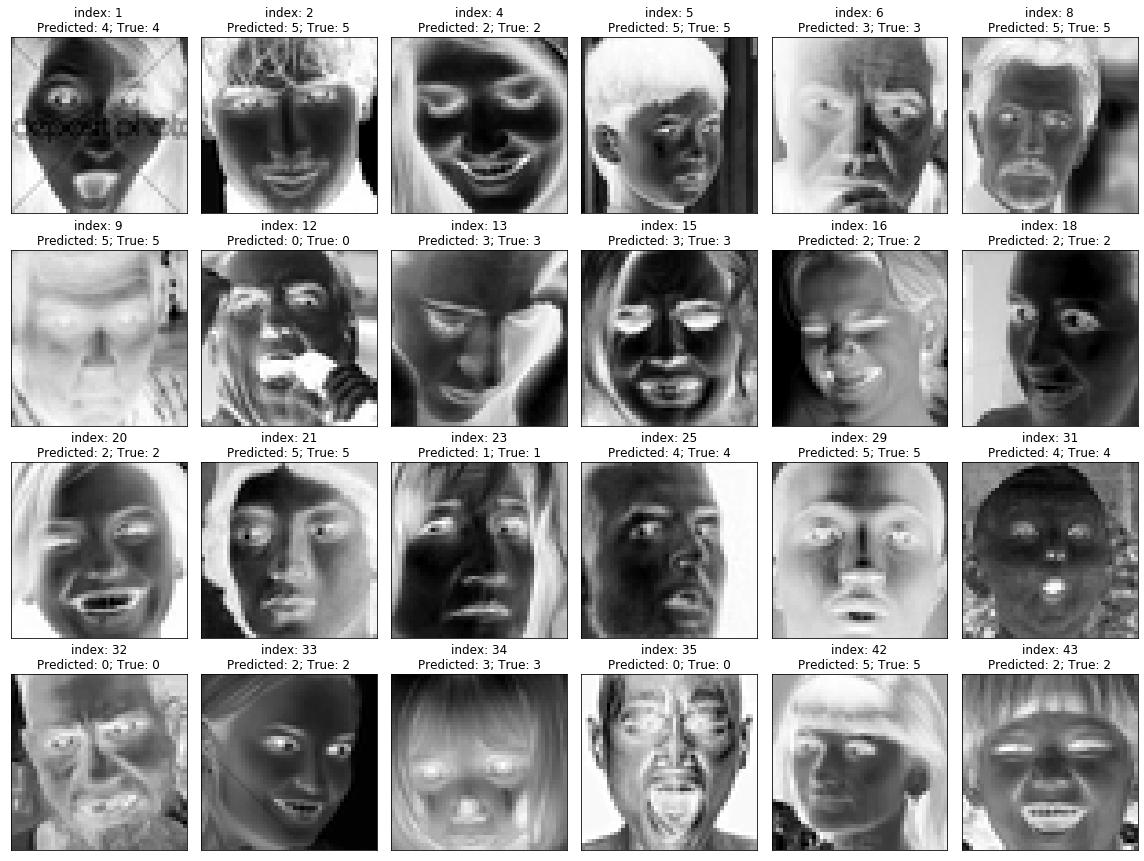

In [21]:
#Correct Predictions

figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))

for axes, item in zip(axes.ravel(), correct_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(f'index: {index}\nPredicted: {predicted}; True: {expected}')
plt.tight_layout()